In [13]:
#importing necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re
%matplotlib inline

In [14]:
#importing koyfin data
koyfin = pd.read_csv('5 jun 21/koyfin_ICM_2021.06.06_01.06.56.517.csv', index_col = 'Ticker')
koyfin.dropna(inplace=True)
koyfin.drop(['AGN', 'BRK', 'CDXS', 'NIO'], inplace = True)
#koyfin.sort_index(inplace=True)
koyfin['Volume Change %'] = koyfin['Rel. Volume'].map(lambda x: (x-1)*100)
#koyfin['Next Earnings'] = koyfin['Next Earnings'].map(lambda x: re.sub('[a-z]+', '', x))
#koyfin['Next Earnings'] = koyfin['Next Earnings'].map(lambda x: datetime.strptime(x, '%a %b %d %Y'))
koyfin.head()

,Name,Sector,Industry,Next Earnings,Market Cap,Avg Volume,Volume (Shrs),Rel. Volume,Volume Change %
Ticker,,,,,,,,,
RESN,Resonant Inc.,Information Technology,Communications Equipment,Mon Aug 9th 2021,245.92,1310776.0,5690127.0,4.34,334.0
EH,EHang Holdings Limited,Industrials,Aerospace and Defense,Wed Jun 9th 2021,1784.15,3005246.0,10023699.0,3.34,234.0
DOCU,DocuSign Inc.,Information Technology,Software,Thu Jun 3rd 2021,45443.34,2110723.0,17069139.0,8.09,709.0
QFIN,360 DigiTech Inc.,Financials,Consumer Finance,Mon Aug 23rd 2021,5573.12,3735884.0,7675484.0,2.05,105.0
MDB,MongoDB Inc.,Information Technology,IT Services,Thu Jun 3rd 2021,19590.91,611553.0,2855268.0,4.67,367.0


In [3]:
#importing options data
options_vol = pd.read_csv('5 jun 21/unusual-options-volume-06-05-2021.csv', index_col='Symbol')
options_vol['Call Volume %'] = round((options_vol['Call Volume']/options_vol['Options Vol'])*100, 1)
options_vol['Put Volume %'] = round((options_vol['Put Volume']/options_vol['Options Vol'])*100, 1)

In [4]:
#importing the pre and default files
pre_1 = pd.read_csv('5 jun 21/watchlist-icm-intraday-06-05-2021.csv', index_col = 'Symbol')
pre_2 = pd.read_csv('5 jun 21/watchlist-icm2-intraday-06-05-2021.csv', index_col = 'Symbol')
default_1 = pd.read_csv('5 jun 21/watchlist-icm-intraday-06-05-2021 default.csv', index_col = 'Symbol')
default_2 = pd.read_csv('5 jun 21/watchlist-icm2-intraday-06-05-2021 default.csv', index_col = 'Symbol')
pre_df = pre_2.append(pre_1)
#pre_df.sort_index(axis=0, inplace=True)
#pre_df.dropna(inplace=True)
pre_df.drop(['Name', 'Last (Ext)', 'Change (Ext)', 'Time (Ext)', 'Last', 'Change', 'Time' ,
             '%Chg', 'Prev %Chg', '% Volume' ,'Prev Vol'], axis=1, inplace = True)
default_df = default_1.append(default_2)
default_df.dropna(inplace=True)
#default_df.sort_index(axis=0, inplace=True)

In [7]:
#import the data from default here
default_1 = pd.read_csv('7 jun 21/watchlist-icm-intraday-06-07-2021.csv', index_col = 'Symbol')
default_2 = pd.read_csv('7 jun 21/watchlist-icm2-intraday-06-07-2021.csv', index_col = 'Symbol')
default = default_1.append(default_2)
default.head()

,Name,Last,%Chg,Volume,1M Avg Vol
Symbol,,,,,
AA,Alcoa Corp,37.83,-2.60%,4270918.0,6725474.0
AAL,American Airlines Gp,24.25,-0.21%,18819810.0,35247605.0
AAP,Advance Auto Parts Inc,193.05,+0.15%,855928.0,968497.0
AAT,American Assets Trust,38.40,+0.92%,398534.0,348913.0
ABCB,Ameris Bancorp,57.19,+1.28%,147880.0,453130.0


In [ ]:
#set(koyfin.index).difference(default_df.index)

In [5]:
def cleaner(x):
    return float(re.sub('%', '', x))

In [19]:
#making the main dataframe
df = koyfin.join(default_df)
main_df = df.join(pre_df)
main_df['%Chg'] = main_df['%Chg'].map(cleaner)
main_df['Prev %Chg'] = main_df['Prev %Chg'].map(cleaner)
main_df.head()

,Name,Sector,Industry,Next Earnings,Market Cap,Avg Volume,Volume (Shrs),Rel. Volume,Volume Change %,Last,%Chg,Prev %Chg,Volume,Prev Vol,%Chg (Ext)
A,Agilent Technologies Inc.,Health Care,Life Sciences Tools and Services,Fri Aug 13th 2021,41844.82,1659137.0,775515.0,0.47,-53.0,137.90,1.12,-0.15,1069600.0,1228700.0,0.00%
AA,Alcoa Corporation,Materials,Metals and Mining,Fri Jul 16th 2021,7252.39,6684115.0,3029707.0,0.45,-55.0,38.84,0.31,-3.20,3361200.0,5030000.0,NaN
AAL,American Airlines Group Inc.,Industrials,Airlines,-,15585.61,36909153.0,27118244.0,0.73,-27.0,24.30,-2.53,-3.45,28977301.0,38254801.0,NaN
AAP,Advance Auto Parts Inc.,Consumer Discretionary,Specialty Retail,Wed Jun 2nd 2021,12612.64,1104338.0,578900.0,0.52,-48.0,192.76,0.85,-0.10,681800.0,918200.0,NaN
AAPL,Apple Inc.,Information Technology,Technology Hardware Storage and Peripherals,Thu Jul 29th 2021,2100805.87,72854754.0,63418604.0,0.87,-13.0,125.89,1.90,-1.22,75169297.0,76229102.0,+0.10%


In [ ]:
#options data on equities offered by ICM
options_df = options_vol.loc[options_vol.index & koyfin.index]
options_df['%Chg'] = options_df['%Chg'].map(cleaner)
options_df.head()

In [ ]:
#Categorising the equities
real_estate = main_df.loc[main_df.Sector==' Real Estate']
information_technology = main_df.loc[main_df.Sector== ' Information Technology']
financials = main_df.loc[main_df.Sector==' Financials']
industrials = main_df.loc[main_df.Sector==' Industrials']
health_care = main_df.loc[main_df.Sector==' Health Care']
consumer_discretionary = main_df.loc[main_df.Sector==' Consumer Discretionary']
communication_services = main_df.loc[main_df.Sector==' Communication Services']
consumer_staples = main_df.loc[main_df.Sector==' Consumer Staples']
materials = main_df.loc[main_df.Sector==' Materials']
utilities = main_df.loc[main_df.Sector==' Utilities']
energy = main_df.loc[main_df.Sector==' Energy']
#etfs = main_df.loc[main_df.Category==' ETF']

In [17]:
#Functions for the analysis factors 
def top_movers(x):
    movers = x.sort_values(by=['%Chg'], ascending = False)
    return movers.iloc[:50, :]

def top_volume(x):
    vol = x.sort_values(by=['Volume Change %'], ascending=False)
    #vol = vol[vol['%Chg'] > 1]
    #vol = vol(vol['Volume Change %', '%Chg'])
    return vol.iloc[:50, :] 

def top_pre(x):
    pre = x.sort_values(by=['%Chg (Ext)'], ascending = False)
    return pre.iloc[:50, :] 

def top_options(x):
    options = x.sort_values(by=['%Chg'], ascending = False)
    return options.iloc[:50, :] 

def top_pcr(x):
    pcr = x.sort_values(by=['%Chg'], ascending = False)
    pcr = pcr.sort_values(by=['Put/Call Vol'])
    return pcr.iloc[:50, :] 

def momentum(x):
    return x.sort_values(by=['Prev %Chg'], ascending = False)

In [ ]:
vol = top_volume(main_df)
perf = top_movers(main_df)
pre = top_pre(pre_df)
opt = top_options(options_df)
pcr = top_pcr(options_df)
momentum_ = momentum(top_movers(main_df))

In [ ]:
a = set(vol.index).intersection(main_df.index)
b = a.intersection(pre.index)
c = b.intersection(opt.index)
d = c.intersection(pcr.index)
len(a)

In [ ]:
vol_perf = main_df[main_df.index & a]
vol_perf_pre = main_df[main_df.index & b]
vol_perf_pre_opt = main_df[main_df.index & c]
vol_perf_pre_opt_pcr = main_df[main_df.index & d]

In [ ]:
one = set(vol.index).intersection(pre.index)
two = set(perf.index).intersection(pre.index)
three = set(opt.index).intersection(pre.index)

In [ ]:
vol_pre = main_df[main_df.index & one]
perf_pre = main_df[main_df.index & two]
opt_pre = main_df[main_df.index & three]

<BarContainer object of 20 artists>

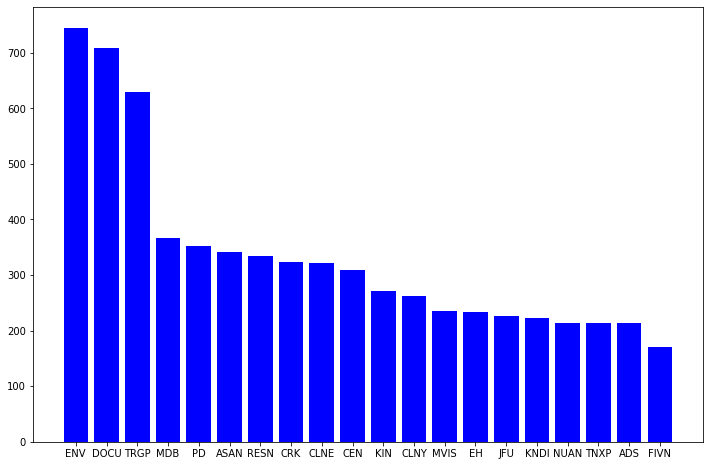

In [21]:
top_volss = top_volume(koyfin)
fig,ax = plt.subplots(figsize=(12,8))
colormat=np.where(top_volss['Volume Change %']>0, 'b','orange')
ax.bar(top_volss.index[:20], top_volss['Volume Change %'][:20], color=colormat)

In [ ]:
sns.set_theme(style="white", context='talk')
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(3,2, figsize=(16,14))

sns.barplot(x=vol[''])

In [ ]:
#plot charts
fig, axes = plt.subplots(3, figsize=(16,12))
fig.suptitle('DASHBOARD')
fig.tight_layout(pad=4)
sns.set_theme(style = 'ticks')

sns.barplot(ax=axes[0], x = pre_market_movers.index, y = pre_market_movers['%Chg (Ext)'], palette = 'viridis')
axes[0].set_title('Pre Market Movers')
axes[0].set_ylabel('%Chg (Ext)')

sns.barplot(ax = axes[1], x = most_active_stocks.index, y = most_active_stocks['Volume Change %'], palette='crest')
axes[1].set_title('Most Active')
axes[1].set_ylabel('Volume Change %')

sns.barplot(ax=axes[2], x = high_performers.index, y = high_performers['%Chg'], palette = 'flare')
axes[2].set_title('Top Performers')
axes[2].set_ylabel('Price Change %')